# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

SAT and ACT are standardised tests for college entrance exams in the US. Colleges typically accept both, however, more competitive colleges have requirements that SAT or ACT is a must.

This project will examine the SAT and ACT datasets for 2017 and 2018 via an exploratory data analysis, and to see if we can find interesting points and relations from these two competing standardised tests.

Variables involved are factors such as participation rates, total score, reading and math scores, broken down into state level samples.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
"""
Running all cells locally will take about 3mins in total due to functions doing the data extraction
work from PDF files later on.

"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tabula # Tabula library used to extract data from PDF later on, to install at terminal: pip install tabula-py
import scipy.stats as stats
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
# Loading both csv files in.

sat = pd.read_csv("../data/2017/sat_2017.csv")
act = pd.read_csv("../data/2017/act_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
sat.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [5]:
# Checking the shape of the SAT dataset

sat.shape

(51, 5)

In [6]:
# Checking the shape of the SAT dataset

act.shape

(52, 7)

In [7]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [8]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:

We have differing number of rows between the 2 sets: 51 for SAT, and 52 for ACT. These should correspond to the number of states so the ACT set should be examined closer for this issue.

Common variable categories shared between the 2 would be Participation, and Math. Whilst the SAT has a Readng and Writing section score as one, the ACT actually has 2 tests related to the testing of English: an English test that goe strictly on the linguistic mechanics, whilst Reading involves an analysis of passages to answer questions. At this point, ACT Reading seems more in line with its similar SAT counterpart, and that's what we will use for now.

ACT has an additional score for Science, which is missing an SAT counterpart. 

The ACT composite score comprises of the average of all sections, whilst the SAT total score is the sum of score for both sections. This can be a bit tricky to try and find certain relationships due to the lack of a Science section in the SAT, as well as the negating of the ACT English section.

Finally, we have numeric datatypes for the appropriate variables, barring Participation in both sets and Composite in the ACT set

#### 4a. Does the data look complete? 

Answer:

The data looks complete as running a test below for any null values within both datasets return false (not accounting for any inaccurate data). 

The ACT data includes one additional "State" entry than the SAT data - it includes a state entry called "National". A quick run below shows this via comparing states between ACT and SAT data. This is confirmed as well by going to the source page, where "National" is shown as an entry within the data.

Checking for unique value counts show that there are 51 counts according to the above observation, barring for 'National' in ACT dataset.

In [9]:
sat_state = [i for i in sat['State']]
act_state = [i for i in act['State']]

for i in act_state:
    if i not in sat_state:
        print(i)

National


In [10]:
act = act[1:] #assigning ACT data stripped of 'National' entry
act.nunique()

State            51
Participation    27
English          35
Math             34
Reading          38
Science          34
Composite        37
dtype: int64

In [11]:
sat["State"].nunique() # Check number of unique states is now 51.

51

In [12]:
sat.isnull().any() # Checking for any null entries in dataframe.

State                                 False
Participation                         False
Evidence-Based Reading and Writing    False
Math                                  False
Total                                 False
dtype: bool

In [13]:
act.isnull().any() # Checking for any null entries in dataframe.

State            False
Participation    False
English          False
Math             False
Reading          False
Science          False
Composite        False
dtype: bool

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: There are some issues with the values within both datasets. This is probably due to rounding issues on most of them, however Maryland on both datasets are out-of-bounds for the scores involved as seen below.

In [14]:
# Checking for states where the sum of both SAT sections do not equate to the figure in "Total".

sat[(sat['Total'] - (sat['Evidence-Based Reading and Writing'] + sat['Math']) != 0)]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
12,Idaho,93%,513,493,1005
15,Iowa,2%,641,635,1275
18,Louisiana,4%,611,586,1198
20,Maryland,69%,536,52,1060
21,Massachusetts,76%,555,551,1107
22,Michigan,100%,509,495,1005
24,Mississippi,2%,634,607,1242
27,Nebraska,3%,629,625,1253


In [15]:
# To see the differences throughout the SAT dataset for the "Total" column.

sat['Total'] - (sat['Evidence-Based Reading and Writing'] + sat['Math'])

0       0
1       0
2       0
3       0
4       0
5       0
6      -1
7       1
8       0
9       0
10      0
11      0
12     -1
13      0
14      0
15     -1
16      0
17      0
18      1
19      0
20    472
21      1
22      1
23      0
24      1
25      0
26      0
27     -1
28      0
29      0
30      0
31      0
32      1
33      0
34      0
35      1
36      0
37      0
38      0
39     -1
40      0
41      1
42      1
43      0
44      0
45      1
46      0
47      0
48      0
49      0
50      0
dtype: int64

In [16]:
# Difference of 472 at index 20 is for Maryland - math score is below minimun threshold of 200 for each section.

sat.iloc[20]

State                                 Maryland
Participation                              69%
Evidence-Based Reading and Writing         536
Math                                        52
Total                                     1060
Name: 20, dtype: object

In [17]:
act_columns = act.columns.to_list()
act_columns

['State',
 'Participation',
 'English',
 'Math',
 'Reading',
 'Science',
 'Composite']

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [18]:
# Checking on Maryland's math score for 2017 returns a score of 524, so we'll fix it with that.

sat.iloc[20,3] = 524

In [19]:
sat.iloc[20] # Checking that the value is now updated.

State                                 Maryland
Participation                              69%
Evidence-Based Reading and Writing         536
Math                                       524
Total                                     1060
Name: 20, dtype: object

In [20]:
act.describe()

,English,Math,Reading,Science
count,51.000000,51.000000,51.000000,51.000000
mean,20.931373,21.182353,22.013725,21.041176
std,2.353677,1.981989,2.067271,3.182463
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.450000,19.900000
50%,20.700000,20.900000,21.800000,21.300000
75%,23.300000,23.100000,24.150000,22.750000
max,25.500000,25.300000,26.000000,24.900000


In [21]:
# Checking Maryland as it has a very low score for Science

act[act['State'] == 'Maryland'] 

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [22]:
# Actual Science score for Maryland is 23.2.

act.iloc[20,5] = 23.2

In [23]:
# Figure now amended to correct score.

act.iloc[20]

State            Maryland
Participation         28%
English              23.3
Math                 23.1
Reading              24.2
Science              23.2
Composite            23.6
Name: 21, dtype: object

#### 5. What are your data types? 
Display the data types of each feature. 

In [24]:
sat.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [25]:
act.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

#### Answer:

The data type for the "Participation" columns on both datasets are of object (string) type due to the presence of the "%" sign. Furthermore, the 'Composite' column in the ACT dataset contains a single value for state "Wyoming" where there's a string "x" attached to its numerical figures. This should be removed, and then the whole column should be casted to a float data type.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [26]:
# Converting column to appropriate type with lambda function.

sat['Participation'] = sat['Participation'].apply(lambda x: int(x.replace("%","")))

In [27]:
# Converting column to appropriate type with lambda function.

act['Participation'] = act['Participation'].apply(lambda x: int(x.replace("%","")))

In [28]:
sat.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


In [29]:
sat.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [30]:
act.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

- Fix any individual values preventing other columns from being the appropriate type.

In [31]:
# Checking items in 'Composite' to see data - an entry with string char that will prevent conversion to float.

act['Composite'].unique() 

array(['19.2', '19.8', '19.7', '19.4', '22.8', '20.8', '25.2', '24.1',
       '24.2', '21.4', '19.0', '22.3', '22.6', '21.9', '21.7', '20.0',
       '19.5', '24.3', '23.6', '25.4', '21.5', '18.6', '20.4', '20.3',
       '17.8', '25.5', '23.9', '19.1', '22.0', '21.8', '23.7', '24.0',
       '18.7', '20.7', '23.8', '20.5', '20.2x'], dtype=object)

In [32]:
# Removing non-numeric characters and converting to float.

act['Composite'] = act['Composite'].replace('\D', "", regex=True).astype(float) 

In [33]:
act['Composite'] = act['Composite']/10 # Converting float back to correct decimal places.

In [34]:
act['Composite'].head() # Checking head

1    19.2
2    19.8
3    19.7
4    19.4
5    22.8
Name: Composite, dtype: float64

- Finish your data modifications by making sure the columns are now typed appropriately.

In [35]:
#Data modifications done in above cells.

- Display the data types again to confirm they are correct.

In [36]:
sat.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [37]:
act.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [38]:
# Creating list of column names to appropriate names for renaming.

sat_col_lower = [("sat_" + i.lower().replace(" ", "_") + "_17") for i in sat.columns]
sat_col_lower[0] = 'state'
sat_col_lower

['state',
 'sat_participation_17',
 'sat_evidence-based_reading_and_writing_17',
 'sat_math_17',
 'sat_total_17']

In [39]:
sat.columns = sat_col_lower # Renaming columns with above list.

In [40]:
sat.columns # Checking column names.

Index(['state', 'sat_participation_17',
       'sat_evidence-based_reading_and_writing_17', 'sat_math_17',
       'sat_total_17'],
      dtype='object')

In [41]:
# Creating list of column names to appropriate names for renaming.

act_col_lower = [("act_" + i.lower().replace(" ", "_") + "_17") for i in act.columns]
act_col_lower[0] = 'state'
act_col_lower

['state',
 'act_participation_17',
 'act_english_17',
 'act_math_17',
 'act_reading_17',
 'act_science_17',
 'act_composite_17']

In [42]:
act.columns = act_col_lower # Renaming columns with above list.

In [43]:
act.columns # Checking column names.

Index(['state', 'act_participation_17', 'act_english_17', 'act_math_17',
       'act_reading_17', 'act_science_17', 'act_composite_17'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|State|object|ACT/SAT|State names, to be used index| 
|Participation|int|ACT/SAT|Percentage of graduating high schoolers who took the test| 
|Evidence-Based Reading and Writing|int|SAT|Average Reading/Writing Score (200-800)|
|Math|int|SAT|Average Math Score (200-800)|
|Total|int|SAT|Average Math Score (400-1600)|
|English|float|ACT|Average English Score (1-36)|
|Math|float|ACT|Average Math Score (1-36)|
|Reading|float|ACT|Average Reading Score (1-36)|
|Science|float|ACT|Average Science Score (1-36)|
|Composite|float|ACT|Average of English, Math, Reading and Science (1-36)|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [44]:
#Additional row already dropped in step 4a

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [45]:
combined_2017 = pd.merge(sat, act, on='state') # Joining both dataframes into one, key is 'state'.

In [46]:
combined_2017.head() # Checking head.

,state,sat_participation_17,sat_evidence-based_reading_and_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8


In [47]:
combined_2017.shape # Checking shape.

(51, 11)

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [48]:
combined_2017.to_csv("../data/2017/combined_2017.csv")

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

The SAT 2018 data lies in 51 different PDF files hosted on a website. These files will be manually downloaded, after which data will be extracted from them using Tabula below.

ACT 2018 will be extracted into a CSV format from the PDF directly

In [49]:
# Function that takes in a state's SAT 2018 file and outputs the required data in a useful dataframe shape.

def create_df(folder, filename, guess=True):
    path = folder+filename
    df1 = tabula.read_pdf(path, pages=4, multiple_tables=True, stream=True, lattice=False)
    df2 = tabula.read_pdf(path, pages=3, multiple_tables=True, stream=True, lattice=True)
    stats = [filename.split(".")[0], df2[1][1][4], df1[0][3][1], df1[0][4][1], df1[0][2][1]]
    name = filename.split(".")[0]
    output = pd.DataFrame(stats, index=['state','sat_participation_18','sat_evidence-based_reading_and_writing_18','sat_math_18','sat_total_18'])
    return output

In [50]:
# Create list of states that will be used in the extraction and concatenate FOR loop in the next cell.

state_list = [i.lower() for i in combined_2017['state']]
print(state_list)

['alabama', 'alaska', 'arizona', 'arkansas', 'california', 'colorado', 'connecticut', 'delaware', 'district of columbia', 'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana', 'maine', 'maryland', 'massachusetts', 'michigan', 'minnesota', 'mississippi', 'missouri', 'montana', 'nebraska', 'nevada', 'new hampshire', 'new jersey', 'new mexico', 'new york', 'north carolina', 'north dakota', 'ohio', 'oklahoma', 'oregon', 'pennsylvania', 'rhode island', 'south carolina', 'south dakota', 'tennessee', 'texas', 'utah', 'vermont', 'virginia', 'washington', 'west virginia', 'wisconsin', 'wyoming']


In [51]:
sat_2018 = pd.DataFrame() # Creating base empty dataframe.

# Loop that runs the function to extract data from each state's SAT PDF file, and then adds it to our base dataframe.
# This might take a minute or two depending on laptop spec.

for i in state_list:
    df = create_df("../data/2018/sat_2018/","{}".format(i)+".pdf")
    sat_2018 = pd.concat([sat_2018 ,df], axis=1, sort=False)

In [52]:
sat_2018 = sat_2018.transpose() # Flip the axes to suit what we would like to use the dataframe in.

In [53]:
sat_2018.head() # Checking head after extraction process has completed.

,state,sat_participation_18,sat_evidence-based_reading_and_writing_18,sat_math_18,sat_total_18
0,alabama,6%,595,571,1166
0,alaska,43%,562,544,1106
0,arizona,29%,577,572,1149
0,arkansas,5%,592,576,1169
0,california,60%,540,536,1076


In [54]:
# Resetting and forming a new index for the dataframe after extraction has completed.

sat_2018.reset_index(drop=True, inplace=True) 
sat_2018.index = sat_2018.index + 1

In [55]:
sat_2018.head() # Checking head after index reset.

,state,sat_participation_18,sat_evidence-based_reading_and_writing_18,sat_math_18,sat_total_18
1,alabama,6%,595,571,1166
2,alaska,43%,562,544,1106
3,arizona,29%,577,572,1149
4,arkansas,5%,592,576,1169
5,california,60%,540,536,1076


In [56]:
sat_2018.dtypes # Checking data types for our dataframe.

state                                        object
sat_participation_18                         object
sat_evidence-based_reading_and_writing_18    object
sat_math_18                                  object
sat_total_18                                 object
dtype: object

In [57]:
sat_2018.isnull().any() # Checking for any null values

state                                        False
sat_participation_18                         False
sat_evidence-based_reading_and_writing_18    False
sat_math_18                                  False
sat_total_18                                  True
dtype: bool

In [58]:
sat_2018_null = sat_2018[sat_2018['sat_total_18'].isnull()] # Viewing rows where null values reside.
sat_2018_null

,state,sat_participation_18,sat_evidence-based_reading_and_writing_18,sat_math_18,sat_total_18
6,colorado,100%,1171,591,NaN
9,district of columbia,92%,989,503,NaN
13,idaho,100%,1005,510,NaN
14,illinois,99%,1022,514,NaN
21,maryland,76%,1118,564,NaN
23,michigan,100%,1013,513,NaN
48,washington,69%,1087,546,NaN
49,west virginia,28%,976,502,NaN


After checking for null values, we can see that there are a few lines in the 'sat_total_18' column that contain them. 

This is a known issue with the Tabula library, where it fails occasionally to discern between 2 values in adjacent cell when there is no explicit cell line. In this case, the reader took the row below the total participation 

In [59]:
sat_2018 = sat_2018.dropna() # Dropping the states where null values are present.

In [60]:
# Function that runs extraction process to create correct data from Tabula's extraction error

def fix_df(folder, filename, guess=True):
    path = folder+filename
    df1 = tabula.read_pdf(path, pages=4, multiple_tables=True, stream=True, lattice=False)
    df2 = tabula.read_pdf(path, pages=3, multiple_tables=True, stream=True, lattice=True)
    stats = [filename.split(".")[0], df2[1][1][4], df1[0][4][0], df1[0][5][0], df1[0][3][0]]   
    name = filename.split(".")[0]
    output = pd.DataFrame(stats, index=['state','sat_participation_18','sat_evidence-based_reading_and_writing_18','sat_math_18','sat_total_18'])
    return output

In [61]:
fix_state_list = [i for i in sat_2018_null['state']] # List of states which need null values fixing.

In [62]:
fix_state_list # Checking state list names.

['colorado',
 'district of columbia',
 'idaho',
 'illinois',
 'maryland',
 'michigan',
 'washington',
 'west virginia']

In [63]:
sat_2018 = sat_2018.transpose() # Transposing dataframe back for function to run.

In [64]:
sat_2018

,1,2,3,4,5,7,8,10,11,12,...,40,41,42,43,44,45,46,47,50,51
state,alabama,alaska,arizona,arkansas,california,connecticut,delaware,florida,georgia,hawaii,...,rhode island,south carolina,south dakota,tennessee,texas,utah,vermont,virginia,wisconsin,wyoming
sat_participation_18,6%,43%,29%,5%,60%,100%,100%,97%,70%,56%,...,97%,55%,3%,6%,64%,4%,61%,68%,3%,3%
sat_evidence-based_reading_and_writing_18,595,562,577,592,540,535,505,522,542,550,...,513,547,622,624,520,618,565,567,641,633
sat_math_18,571,544,572,576,536,519,492,493,522,549,...,505,523,618,607,512,612,554,550,653,625
sat_total_18,1166,1106,1149,1169,1076,1053,998,1014,1064,1099,...,1018,1070,1241,1231,1032,1230,1120,1117,1294,1257


In [65]:
# Running fix function for affected states.
# This will take about a minute to run.

for i in fix_state_list:
    df = fix_df("../data/2018/sat_2018/","{}".format(i)+".pdf")
    sat_2018 = pd.concat([sat_2018 ,df], axis=1, sort=False)

In [66]:
sat_2018 = sat_2018.transpose() # Transposing dataframe back to correct orientation.

In [67]:
sat_2018

,state,sat_participation_18,sat_evidence-based_reading_and_writing_18,sat_math_18,sat_total_18
1,alabama,6%,595,571,1166
2,alaska,43%,562,544,1106
3,arizona,29%,577,572,1149
4,arkansas,5%,592,576,1169
5,california,60%,540,536,1076
7,connecticut,100%,535,519,1053
8,delaware,100%,505,492,998
10,florida,97%,522,493,1014
11,georgia,70%,542,522,1064
12,hawaii,56%,550,549,1099


In [68]:
sat_2018 = sat_2018.sort_values('state') # Sort dataframe by state names.

In [69]:
# Resetting and forming a new index for the dataframe after extraction has completed.

sat_2018.reset_index(drop=True, inplace=True) 
sat_2018.index = sat_2018.index + 1

In [70]:
sat_2018

,state,sat_participation_18,sat_evidence-based_reading_and_writing_18,sat_math_18,sat_total_18
1,alabama,6%,595,571,1166
2,alaska,43%,562,544,1106
3,arizona,29%,577,572,1149
4,arkansas,5%,592,576,1169
5,california,60%,540,536,1076
6,colorado,100%,519,506,1025
7,connecticut,100%,535,519,1053
8,delaware,100%,505,492,998
9,district of columbia,92%,497,480,977
10,florida,97%,522,493,1014


In [71]:
sat_2018['sat_math_18'] = sat_2018['sat_math_18'].astype(int) # Changing dtype for 'sat_math_18' to integer.

In [72]:
# Changing dtype for 'sat_evidence-based_reading_and_writing_18' to integer.

sat_2018['sat_evidence-based_reading_and_writing_18'] = sat_2018['sat_evidence-based_reading_and_writing_18'].astype(int)

In [73]:
sat_2018.dtypes # Checking dtypes

state                                        object
sat_participation_18                         object
sat_evidence-based_reading_and_writing_18     int64
sat_math_18                                   int64
sat_total_18                                 object
dtype: object

In [74]:
# Removing '%' from 'sat_participation_18' column.

sat_2018['sat_participation_18'] = sat_2018['sat_participation_18'].replace("%","", regex=True)

In [75]:
# Changing dtypes for numeric-based columns.

sat_2018['sat_participation_18'] = sat_2018['sat_participation_18'].astype(int)
sat_2018['sat_total_18'] = sat_2018['sat_total_18'].astype(int)

In [76]:
sat_2018.dtypes

state                                        object
sat_participation_18                          int64
sat_evidence-based_reading_and_writing_18     int64
sat_math_18                                   int64
sat_total_18                                  int64
dtype: object

In [77]:
# Changing state names to match combined_2017 format.

sat_2018['state'] = sat_2018['state'].str.title()

In [78]:
# Removing caps on 'Of' in 'District Of Columbia'.

sat_2018.iloc[:][8:9]['state'] = 'District of Columbia'

In [79]:
# Checking head

sat_2018.head(10)

,state,sat_participation_18,sat_evidence-based_reading_and_writing_18,sat_math_18,sat_total_18
1,Alabama,6,595,571,1166
2,Alaska,43,562,544,1106
3,Arizona,29,577,572,1149
4,Arkansas,5,592,576,1169
5,California,60,540,536,1076
6,Colorado,100,519,506,1025
7,Connecticut,100,535,519,1053
8,Delaware,100,505,492,998
9,District of Columbia,92,497,480,977
10,Florida,97,522,493,1014


In [80]:
# Setting new column with total score calculated from the reading/writing and math sections.

sat_2018['total_sum'] = sat_2018['sat_evidence-based_reading_and_writing_18'] + sat_2018['sat_math_18']

In [81]:
# Checking to see if there are any indications of inaccurate data values.

sat_2018['sat_total_18'] - sat_2018['total_sum']

1     0
2     0
3     0
4     1
5     0
6     0
7    -1
8     1
9     0
10   -1
11    0
12    0
13    0
14    0
15    1
16    0
17    1
18    0
19    0
20    0
21    0
22    0
23    1
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    1
33    0
34    1
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    1
43    0
44    0
45    0
46    1
47    0
48    0
49    0
50    0
51   -1
dtype: int64

Seeing as all the differences found are due probably to rounding (all < 1 diff), the data can be deemed accurate enough.

In [82]:
sat_2018 = sat_2018.drop('total_sum', axis=1) # Dropping now-unneeded column

In [83]:
sat_2018

,state,sat_participation_18,sat_evidence-based_reading_and_writing_18,sat_math_18,sat_total_18
1,Alabama,6,595,571,1166
2,Alaska,43,562,544,1106
3,Arizona,29,577,572,1149
4,Arkansas,5,592,576,1169
5,California,60,540,536,1076
6,Colorado,100,519,506,1025
7,Connecticut,100,535,519,1053
8,Delaware,100,505,492,998
9,District of Columbia,92,497,480,977
10,Florida,97,522,493,1014


In [84]:
# Writing cleaned data to csv for safekeeping.
# If need be, this can be reloaded back instead of running the pdf extraction functions again.

sat_2018.to_csv("../data/2018/sat_2018/sat_2018.csv") 

The ACT data was collected from the web and then converted into a CSV for loading.

In [85]:
act_2018 = pd.read_csv("../data/2018/act_2018/act_2018.csv") # Loading CSV

In [86]:
act_2018.head()

,State,Participation,Composite Score,English,Math,Reading,Science
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [87]:
act_2018.shape # Checking shape

(51, 7)

In [88]:
act_2018.dtypes # Checking dtypes for dataframe

State               object
Participation        int64
Composite Score    float64
English            float64
Math               float64
Reading            float64
Science            float64
dtype: object

In [89]:
# list for column rename

act_2018_col = ['state', 'act_participation_18', 'act_composite_2018', 'act_english_18', 'act_math_18', 'act_reading_18', 'act_science_18']

In [90]:
act_2018.columns = act_2018_col # Changing column names to the correct names.

In [91]:
act_2018.head()

,state,act_participation_18,act_composite_2018,act_english_18,act_math_18,act_reading_18,act_science_18
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [92]:
# Checking to see if states match for both SAT and ACT 2018 data.

sat_state = [i for i in sat_2018['state']]
act_state = [i for i in act_2018['state']]

for i in act_state:
    if i not in sat_state:
        print(i)
        
for i in sat_state:
    if i not in act_state:
        print(i)        

In [93]:
act_2018.to_csv("../data/2018/act_2018/act_2018_final.csv") # Writing data to CSV for safekeeping.

In [94]:
# Merging both SAT and ACT 2018 datasets into one

combined_2018 = pd.merge(sat_2018, act_2018, on='state', left_index=True)

In [95]:
combined_2018.shape # Checking shape of new merged dataset

(51, 11)

In [96]:
combined_2018.reset_index(drop=True, inplace=True) # Resetting index of new dataset
combined_2018.index = combined_2018.index + 1 # Setting index to start at 1

In [97]:
combined_2018.head()

,state,sat_participation_18,sat_evidence-based_reading_and_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_2018,act_english_18,act_math_18,act_reading_18,act_science_18
1,Alabama,6,595,571,1166,100,19.1,18.9,18.3,19.6,19.0
2,Alaska,43,562,544,1106,33,20.8,19.8,20.6,21.6,20.7
3,Arizona,29,577,572,1149,66,19.2,18.2,19.4,19.5,19.2
4,Arkansas,5,592,576,1169,100,19.4,19.1,18.9,19.7,19.4
5,California,60,540,536,1076,27,22.7,22.5,22.5,23.0,22.1


In [98]:
combined_2018.shape # Checking final shape.

(51, 11)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [99]:
combined_2017.shape # Checking 2017 dataset shape

(51, 11)

In [100]:
final = pd.merge(combined_2017, combined_2018, on='state', left_index=True) # Merging to create full dataset

In [101]:
final.shape # Checking shape

(51, 21)

In [102]:
final.reset_index(drop=True, inplace=True) # Resetting index

In [103]:
final.head() # Checking head

,state,sat_participation_17,sat_evidence-based_reading_and_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,...,sat_participation_18,sat_evidence-based_reading_and_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_2018,act_english_18,act_math_18,act_reading_18,act_science_18
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,...,6,595,571,1166,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,...,43,562,544,1106,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,...,29,577,572,1149,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,...,5,592,576,1169,100,19.4,19.1,18.9,19.7,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,...,60,540,536,1076,27,22.7,22.5,22.5,23.0,22.1


In [104]:
final.dtypes # Final check on dtypes

state                                         object
sat_participation_17                           int64
sat_evidence-based_reading_and_writing_17      int64
sat_math_17                                    int64
sat_total_17                                   int64
act_participation_17                           int64
act_english_17                               float64
act_math_17                                  float64
act_reading_17                               float64
act_science_17                               float64
act_composite_17                             float64
sat_participation_18                           int64
sat_evidence-based_reading_and_writing_18      int64
sat_math_18                                    int64
sat_total_18                                   int64
act_participation_18                           int64
act_composite_2018                           float64
act_english_18                               float64
act_math_18                                  f

In [105]:
# Writing final dataframe to csv.

final.to_csv("../data/final.csv") 

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [106]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_participation_17,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_evidence-based_reading_and_writing_17,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_17,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_total_17,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_participation_17,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_17,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_17,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_17,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_17,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_composite_17,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [107]:
# Function to calculate standard deviation

def std_dev(data):
    x = [i for i in data]
    mean = sum(x)/len(x)
    var = [(i-mean)**2 for i in x]
    return (sum(var)/len(x))**0.5

In [108]:
final['sat_participation_17']

0       5
1      38
2      30
3       3
4      53
5      11
6     100
7     100
8     100
9      83
10     61
11     55
12     93
13      9
14     63
15      2
16      4
17      4
18      4
19     95
20     69
21     76
22    100
23      3
24      2
25      3
26     10
27      3
28     26
29     96
30     70
31     11
32     67
33     49
34      2
35     12
36      7
37     43
38     65
39     71
40     50
41      3
42      5
43     62
44      3
45     60
46     65
47     64
48     14
49      3
50      3
Name: sat_participation_17, dtype: int64

In [109]:
std_dev(final['sat_participation_17']) # Testing of std function on 'sat_participation_17 column'

34.92907076664508

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [110]:
# Selecting numerical columns only and assigning them to list for running of dict comprehension

final_numeric = final.select_dtypes(include=['float', 'int']) 
final_num_cols = [x for x in final_numeric.columns]

In [111]:
# Dictionary comprehension to apply std function onto numerical columns

std_dict = {i:std_dev(final_numeric[i]) for i in final_num_cols}
std_dict

{'sat_participation_17': 34.92907076664508,
 'sat_evidence-based_reading_and_writing_17': 45.21697020437866,
 'sat_math_17': 46.65713364485503,
 'sat_total_17': 91.58351056778743,
 'act_participation_17': 31.824175751231806,
 'act_english_17': 2.3304876369363363,
 'act_math_17': 1.9624620273436781,
 'act_reading_17': 2.0469029314842646,
 'act_science_17': 1.7222161451443676,
 'act_composite_17': 2.000786081581989,
 'sat_participation_18': 37.59555300213487,
 'sat_evidence-based_reading_and_writing_18': 44.87118561762388,
 'sat_math_18': 48.40589946919447,
 'sat_total_18': 92.94372462792965,
 'act_participation_18': 33.745194881997506,
 'act_composite_2018': 2.0855261815801147,
 'act_english_18': 2.4222536143202795,
 'act_math_18': 2.015707255555717,
 'act_reading_18': 2.145891884510421,
 'act_science_18': 1.8516885484833543}

In [112]:
final_numeric.describe() # Run .std method from Pandas

,sat_participation_17,sat_evidence-based_reading_and_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_18,sat_evidence-based_reading_and_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_2018,act_english_18,act_math_18,act_reading_18,act_science_18
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,46.529412,567.294118,557.254902,1124.666667,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,37.969647,45.317676,48.887562,93.868561,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,497.000000,480.000000,977.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.500000,535.000000,521.500000,1062.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,52.000000,552.000000,547.000000,1099.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,79.500000,616.500000,600.500000,1220.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


In [113]:
np.std(final_numeric) # Run Numpy's .std method

sat_participation_17                         34.929071
sat_evidence-based_reading_and_writing_17    45.216970
sat_math_17                                  46.657134
sat_total_17                                 91.583511
act_participation_17                         31.824176
act_english_17                                2.330488
act_math_17                                   1.962462
act_reading_17                                2.046903
act_science_17                                1.722216
act_composite_17                              2.000786
sat_participation_18                         37.595553
sat_evidence-based_reading_and_writing_18    44.871186
sat_math_18                                  48.405899
sat_total_18                                 92.943725
act_participation_18                         33.745195
act_composite_2018                            2.085526
act_english_18                                2.422254
act_math_18                                   2.015707
act_readin

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:

The manually calculated standard deviations match up with the output from Pandas's describe, as it applies Bessel's correction in calculating standard deviations for samples (N-1 size). Numpy's std method uses the full sample size N in its calculations. 

In order to get Numpy's std method to match up, we need to put in a parameter of ddof=1 (1 degree of freedom), as shown below.



In [114]:
np.std(final_numeric, ddof=1) # Numpy's std method with n-1 degree of freedom added.

sat_participation_17                         35.276632
sat_evidence-based_reading_and_writing_17    45.666901
sat_math_17                                  47.121395
sat_total_17                                 92.494812
act_participation_17                         32.140842
act_english_17                                2.353677
act_math_17                                   1.981989
act_reading_17                                2.067271
act_science_17                                1.739353
act_composite_17                              2.020695
sat_participation_18                         37.969647
sat_evidence-based_reading_and_writing_18    45.317676
sat_math_18                                  48.887562
sat_total_18                                 93.868561
act_participation_18                         34.080976
act_composite_2018                            2.106278
act_english_18                                2.446356
act_math_18                                   2.035765
act_readin

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [115]:
# Selecting columns related to participation rates

participation_rates = final[['state', 'sat_participation_17', 'act_participation_17', 'sat_participation_18', 'act_participation_18']]

In [116]:
participation_rates.head() # Checking head

,state,sat_participation_17,act_participation_17,sat_participation_18,act_participation_18
0,Alabama,5,100,6,100
1,Alaska,38,65,43,33
2,Arizona,30,62,29,66
3,Arkansas,3,100,5,100
4,California,53,31,60,27


In [117]:
# Using describe method to find min/max values for our data.

participation_rates.describe()

,sat_participation_17,act_participation_17,sat_participation_18,act_participation_18
count,51.000000,51.000000,51.000000,51.000000
mean,39.803922,65.254902,46.529412,61.647059
std,35.276632,32.140842,37.969647,34.080976
min,2.000000,8.000000,2.000000,7.000000
25%,4.000000,31.000000,4.500000,28.500000
50%,38.000000,69.000000,52.000000,66.000000
75%,66.000000,100.000000,79.500000,100.000000
max,100.000000,100.000000,100.000000,100.000000


In [118]:
# Finding states where participation rates for SAT 2017 matches the max value.

participation_rates[participation_rates['sat_participation_17'] == 100]

,state,sat_participation_17,act_participation_17,sat_participation_18,act_participation_18
6,Connecticut,100,31,100,26
7,Delaware,100,18,100,17
8,District of Columbia,100,32,92,32
22,Michigan,100,29,100,22


There're a few things that pop out here, and that is that the states with 100% in SAT participation are blue (Democratic) states, and that the results above show an inverse relationship between the 2 - this makes sense as college admissions only require one out of the two tests. 

It's also interesting to note that D.C. showed a drop in participation rate in 2018, whilst ACT participation rates remained the same.

In [119]:
# Finding states where participation rates for SAT 2017 matches the min value.

participation_rates[participation_rates['sat_participation_17'] == 2]

,state,sat_participation_17,act_participation_17,sat_participation_18,act_participation_18
15,Iowa,2,67,3,68
24,Mississippi,2,100,3,100
34,North Dakota,2,98,2,98


We see a similar pattern here as the above max SAT participation rates - as the two tests are more or less inversely related. These are traditionally red states, so the pattern as seen in the previous comparison is showing here as well. ACT has been shown to be the test of choice for red states.

In [120]:
# Finding states where participation rates for ACT 2017 matches the max value.

participation_rates[participation_rates['act_participation_17'] == 100]

,state,sat_participation_17,act_participation_17,sat_participation_18,act_participation_18
0,Alabama,5,100,6,100
3,Arkansas,3,100,5,100
5,Colorado,11,100,100,30
17,Kentucky,4,100,4,100
18,Louisiana,4,100,4,100
23,Minnesota,3,100,4,99
24,Mississippi,2,100,3,100
25,Missouri,3,100,4,100
26,Montana,10,100,10,100
28,Nevada,26,100,23,100


Colorado shows an interesting participation statistic here, as SAT participation surged up whilst ACT participation dropped tremendously. An immediate thought is whether there was a push at the state level where students were encouraged to take on the SAT and drop ACT as a test. 

Searching for answers show a few reports that both Illinois and Colorado have decided to award The College Board (makers of the SAT) the contract to provide testing to give 11th graders at no extra charge in 2015. This also follows Colorado's state legislation to require their high school junior students to take the SAT starting in 2015. This significantly primes students before high school to take the SAT as their test of choice.

In [121]:
# Finding states where participation rates for ACT 2017 matches the min value.

participation_rates[participation_rates['act_participation_17'] == 8]

,state,sat_participation_17,act_participation_17,sat_participation_18,act_participation_18
19,Maine,95,8,99,7


Maine, with the lowest ACT participation rate for 2017, shows a consistent relationship between the two tests as per prior comparisons. SAT participation has climbed to 99 from 95, whilst ACT dropped by 1.

In [122]:
# Finding states where participation rates for SAT 2018 matches the max value.

participation_rates[participation_rates['sat_participation_18'] == 100]

,state,sat_participation_17,act_participation_17,sat_participation_18,act_participation_18
5,Colorado,11,100,100,30
6,Connecticut,100,31,100,26
7,Delaware,100,18,100,17
12,Idaho,93,38,100,36
22,Michigan,100,29,100,22


Nothing too surprising here aside from Colorado which we've covered prior, but it does show that general ACT participation in SAT strongholds are continuing to decline. Another interesting bit here is that Idaho is not a blue state, so it runs contrary to a pattern I've noted prior.

In [123]:
# Finding states where participation rates for SAT 201 matches the min value.

participation_rates[participation_rates['sat_participation_18'] == 2]

,state,sat_participation_17,act_participation_17,sat_participation_18,act_participation_18
34,North Dakota,2,98,2,98


North Dakota shows the same pattern as identified above. It should be noted that North Dakota has been allowed to use the ACT instead of the state exam since 2017, although the state doesn't offer free ACT testing.

In [124]:
# Finding states where participation rates for ACT 2018 matches the max value.

participation_rates[participation_rates['act_participation_18'] == 100]

,state,sat_participation_17,act_participation_17,sat_participation_18,act_participation_18
0,Alabama,5,100,6,100
3,Arkansas,3,100,5,100
17,Kentucky,4,100,4,100
18,Louisiana,4,100,4,100
24,Mississippi,2,100,3,100
25,Missouri,3,100,4,100
26,Montana,10,100,10,100
27,Nebraska,3,84,3,100
28,Nevada,26,100,23,100
33,North Carolina,49,100,52,100


The following states decree that it's a requirement to take the ACT (with or without writing):

Alabama,
Arkansas,
Montana,
Nevada,
North Carolina,
North Dakota,
Utah,
Wisconsin,
Kentucky,
Louisiana,
Mississippi,
Nebraska,
Wyoming.

All the states listed above show a maximum participation rate in 2018, which makes sense as it's a requirement for them to take the ACT.

Ohio has shown a jump in 75 to 100 participation rate, and this correlates to the reform in 2018 where the state paid for all students to take the ACT.

In [125]:
# Finding states where participation rates for ACT 2018 matches the min value.

participation_rates[participation_rates['act_participation_18'] == 7]

,state,sat_participation_17,act_participation_17,sat_participation_18,act_participation_18
19,Maine,95,8,99,7


Of all the states which have participated 100% in 2017, the following have participation rate changes in 2018 (bracket shows 2018 rates):

SAT: District of Columbia (92%)  
ACT: Colorado (30%), Minnesota (99%)

In [126]:
# Finding states that have participation rates above 50% for 2017.

participation_rates[(participation_rates['act_participation_17'] > 50) & (participation_rates['sat_participation_17'] > 50)]

,state,sat_participation_17,act_participation_17,sat_participation_18,act_participation_18
9,Florida,83,73,97,66
10,Georgia,61,55,70,53
11,Hawaii,55,90,56,89


Florida's increase in SAT participation rate ties in with the state's decision to start providing free SAT test sessions at school. It should also be noted that The College Board has partnered with Khan Academy (a popular online learning platform) to incorporate free online SAT lessons and practice tests.

In [127]:
# Finding states that have participation rates above 50% for 2018.

participation_rates[(participation_rates['act_participation_18'] > 50) & (participation_rates['sat_participation_18'] > 50)]

,state,sat_participation_17,act_participation_17,sat_participation_18,act_participation_18
9,Florida,83,73,97,66
10,Georgia,61,55,70,53
11,Hawaii,55,90,56,89
33,North Carolina,49,100,52,100
40,South Carolina,50,100,55,100


Similar pattern here as the prior cell, and we see North and South Carolina to creep up past 50 for SAT participation, despite not showing any drops in ACT participation rates.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [128]:
numeric = final.drop('state', axis=1) # Dropping 'state' to retain only numeric columns.

Text(0.5, 1.0, '2017 Correlation Heatmap')

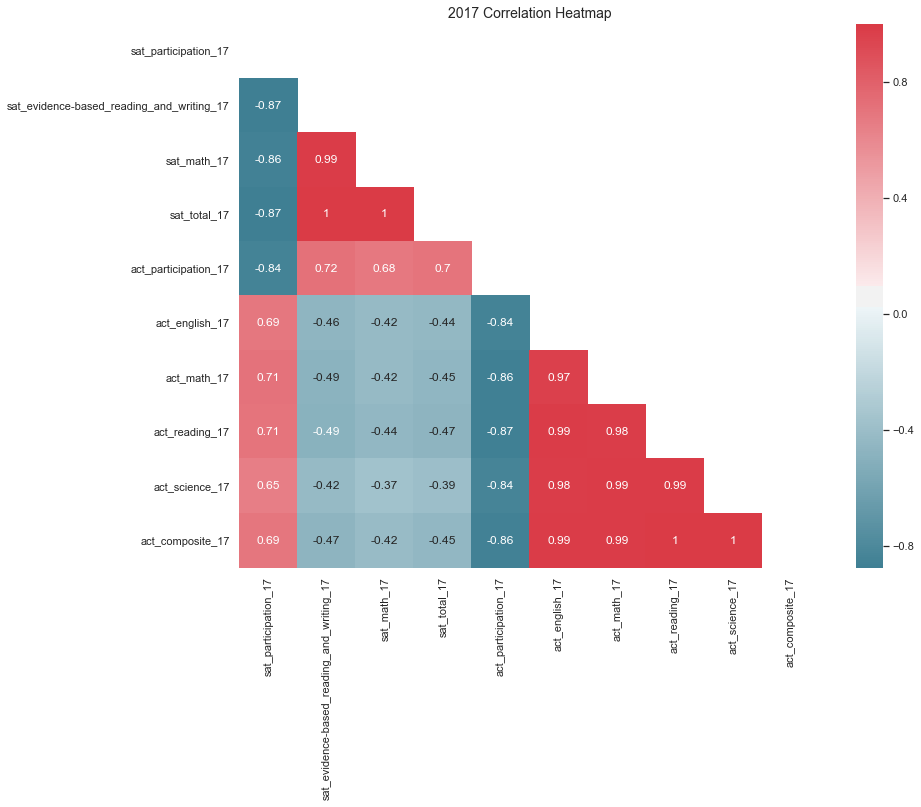

In [129]:
# Heatmap for 2017 data only.

corr_2017 = combined_2017.drop('state', axis=1)
plt.figure(figsize=(13,10))
numeric_corr_2017 = corr_2017.corr()
sns.set(style="white")
mask = np.zeros_like(numeric_corr_2017, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap1 = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(numeric_corr_2017, mask=mask, annot=True, cmap=cmap1).set_title("2017 Correlation Heatmap", fontsize=14)

Text(0.5, 1.0, '2018 Correlation Heatmap')

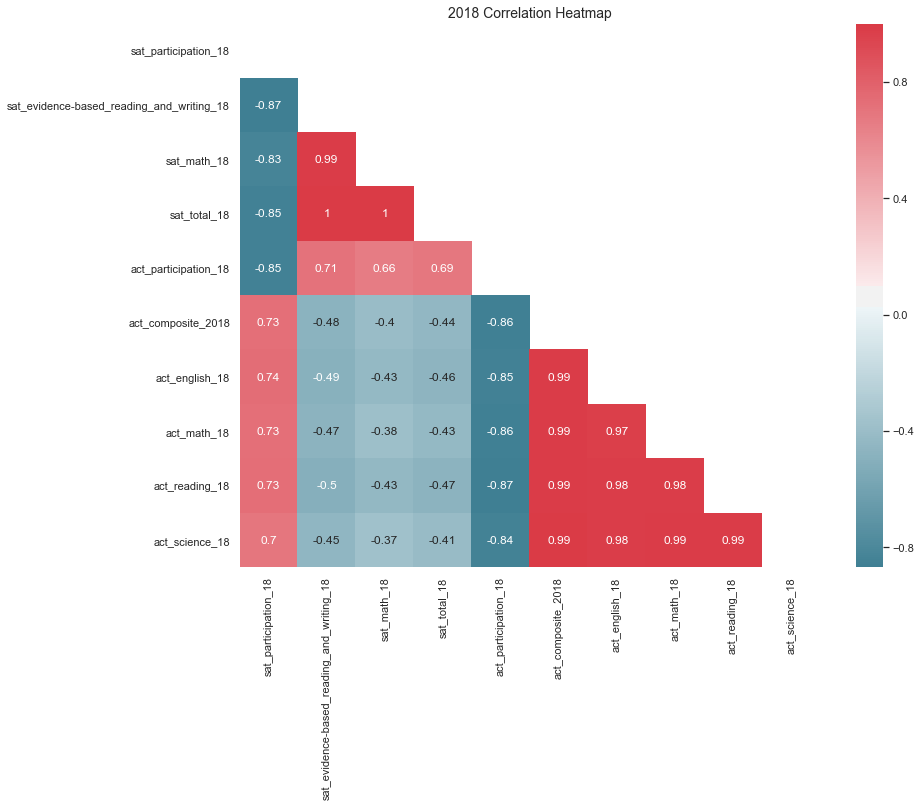

In [130]:
# Heatmap for 2018 data only.

corr_2018 = combined_2018.drop('state', axis=1)
plt.figure(figsize=(13,10))
numeric_corr_2018 = corr_2018.corr()
sns.set(style="white")
mask = np.zeros_like(numeric_corr_2018, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap1 = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(numeric_corr_2018, mask=mask, annot=True, cmap=cmap1).set_title("2018 Correlation Heatmap", fontsize=14)

Text(0.5, 1.0, 'Combined Correlation Heatmap')

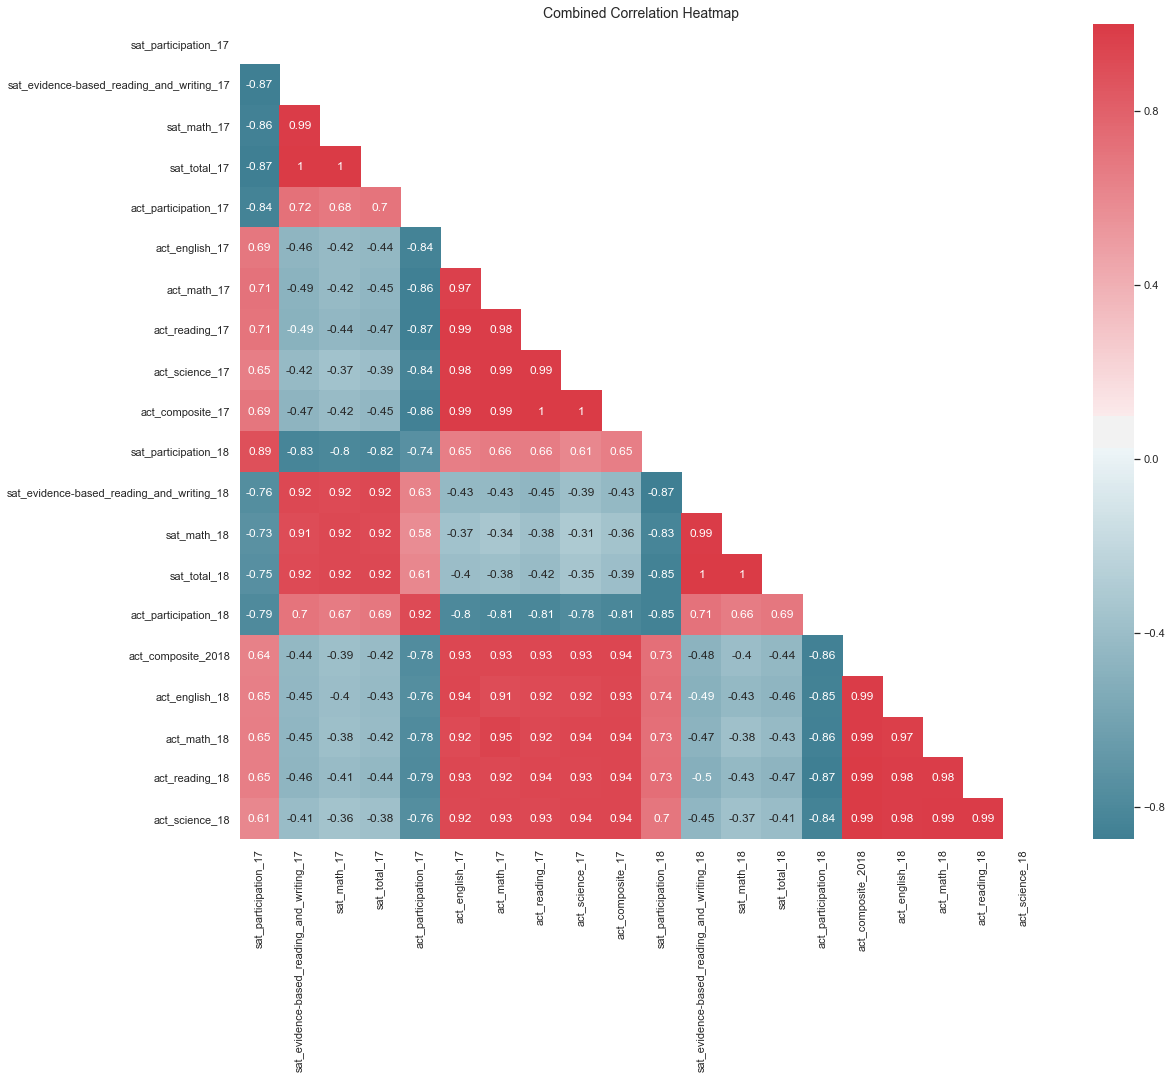

In [131]:
# Make a heatmap on the correlations between variables in the housing data:

numeric_corr = numeric.corr
plt.figure(figsize=(18,15))
numeric_corr = numeric.corr()
sns.set(style="white")
mask = np.zeros_like(numeric_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap1 = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(numeric_corr, mask=mask, annot=True, cmap=cmap1).set_title("Combined Correlation Heatmap", fontsize=14)

For the correlation running the heatmaps here, I've selected the Kendall method as it's more reliable for non-parametric distributions, and is less sensitive to outliers which is useful in small sample sizes.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [132]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, size=(15,6), bins=13):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=size) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], bins=bins, color=colors[i]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i], pad=15, fontsize=15)
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=13)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

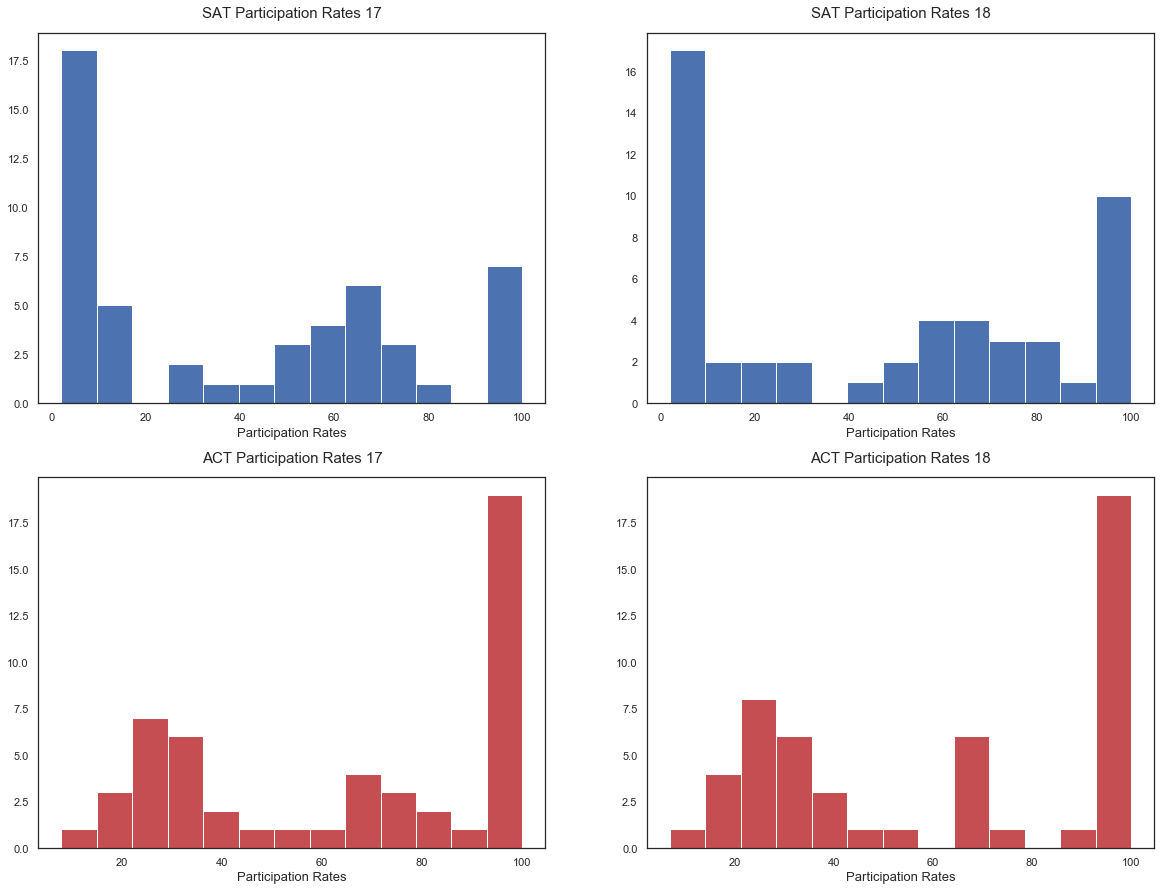

In [133]:
# Creating histograms for participation rates on both tests for both years.

participation_list = ['sat_participation_17', 'sat_participation_18', 'act_participation_17', 'act_participation_18']
participation_titles = ['SAT Participation Rates 17', 'SAT Participation Rates 18', 'ACT Participation Rates 17', 'ACT Participation Rates 18']
participation_xlabels = ['Participation Rates', 'Participation Rates', 'Participation Rates', 'Participation Rates']
colors = ['b','b','r','r']

subplot_histograms(final, participation_list, participation_titles, participation_xlabels, size=(20,15))

We can see from the plots above that there's a general uptick in participation rates for the SAT as the distribution is showing a shift to the right. Things look a little more unfortunate for the ACT, as the distribution shows a drop in participation rates as it shifts to the left.

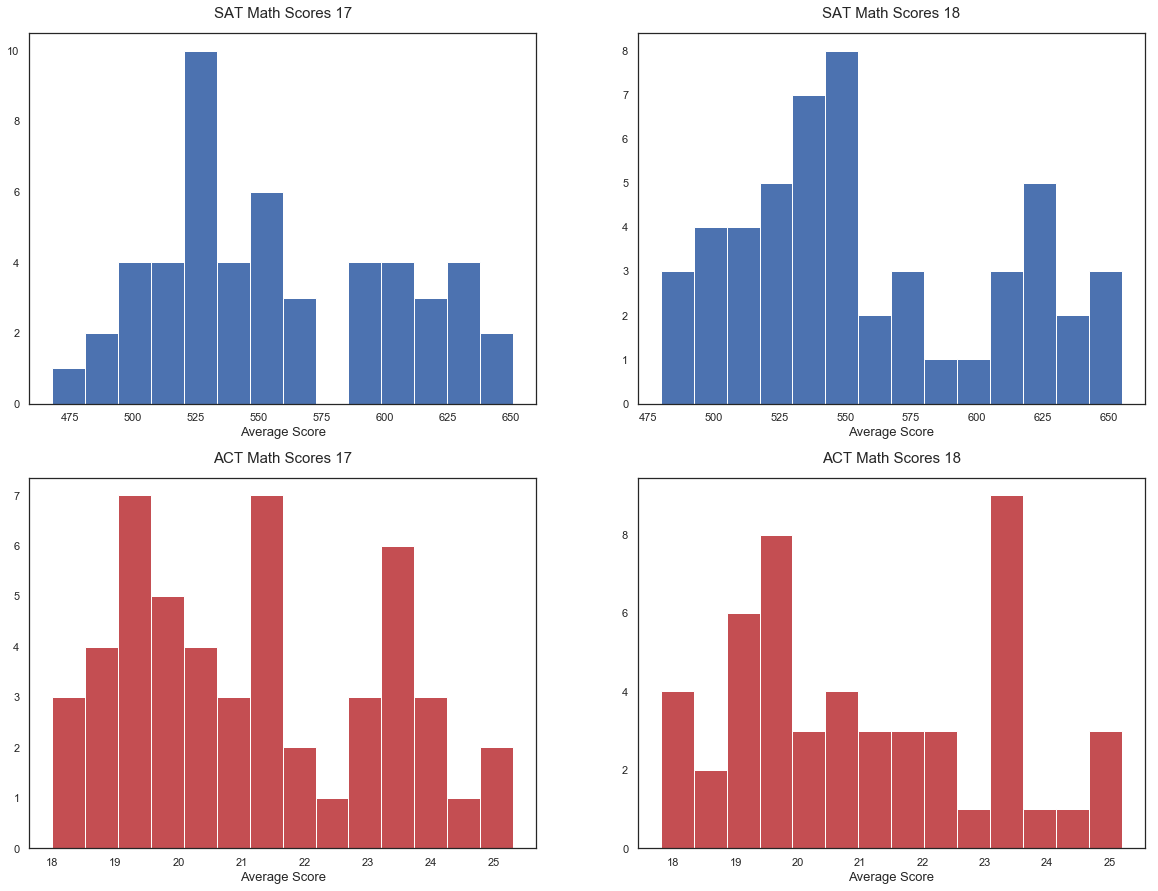

In [134]:
# Creating histograms for math scores on both tests for both years.

math_list = ['sat_math_17', 'sat_math_18', 'act_math_17', 'act_math_18']
math_titles = ['SAT Math Scores 17', 'SAT Math Scores 18', 'ACT Math Scores 17', 'ACT Math Scores 18']
math_xlabels = ['Average Score', 'Average Score', 'Average Score', 'Average Score']
colors = ['b','b','r','r']

subplot_histograms(final, math_list, math_titles, math_xlabels, size=(20,15), bins=14)

Coming to looking at the data for math scores, we see that the scores for SAT in 2018 has dropped significantly, and a quick reference back to our earlier heatmap for 2018 data shows an interesting note: an inverse relationship between SAT participation and math scores in 2018. Even though this was already present in 2017, the fact that there're more SAT participants this time has also increased the number of lower math scores.

Over on the ACT front, we see a slight increase in average math scores, with the distribution shifting more towards the right.

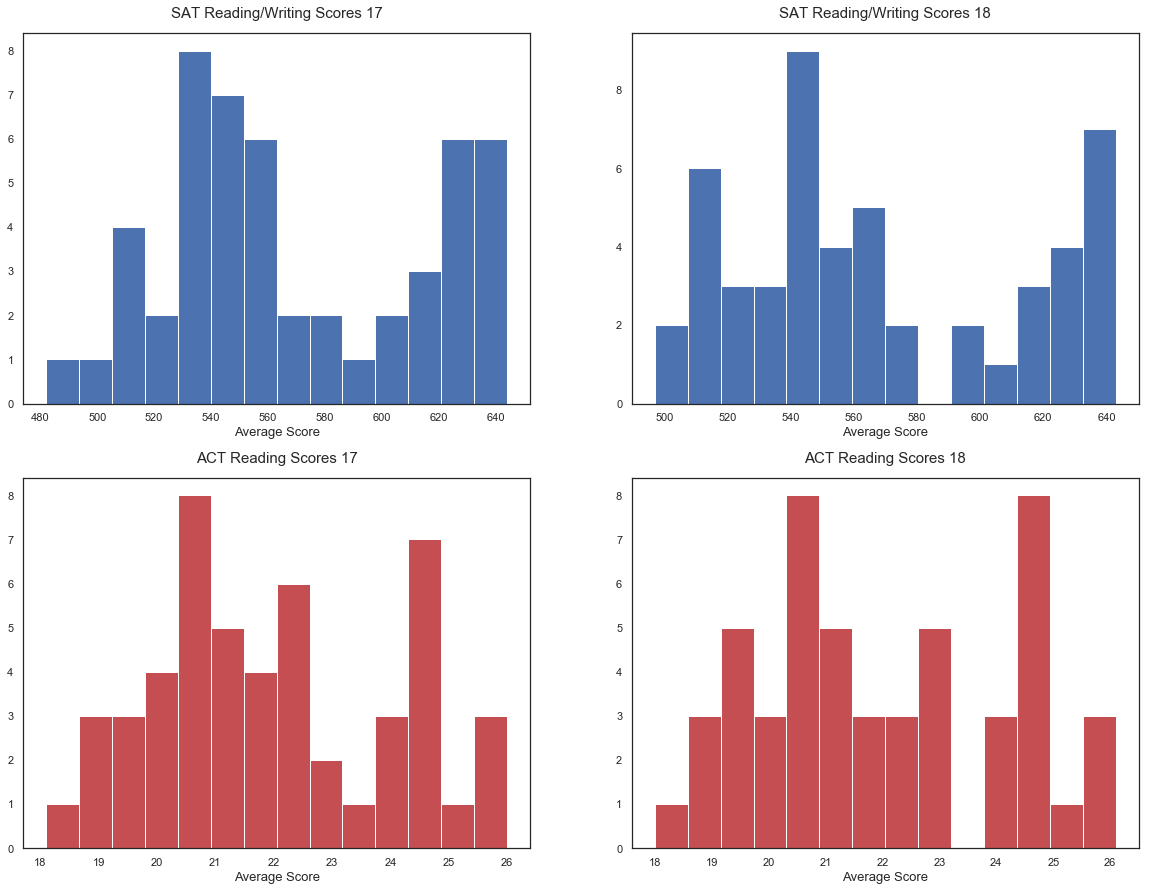

In [135]:
# Creating histograms for reading/writing scores on both tests for both years.

read_list = ['sat_evidence-based_reading_and_writing_17', 'sat_evidence-based_reading_and_writing_18', 'act_reading_17', 'act_reading_18']
read_titles = ['SAT Reading/Writing Scores 17', 'SAT Reading/Writing Scores 18', 'ACT Reading Scores 17', 'ACT Reading Scores 18']
read_xlabels = ['Average Score', 'Average Score', 'Average Score', 'Average Score']
colors = ['b','b','r','r']

subplot_histograms(final, read_list, read_titles, read_xlabels, size=(20,15), bins=14)

Likewise for SAT reading/writing scores, we see a similar trend with respect to the SAT average math scores. With an inverse relationship against participation rates, this has resulted in  lower average scores appearing.

It's also the same story here for ACT, with scores slightly improving due to falling participation rates (inverse relationship from heatmap 2018).

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [136]:
# Creating function for single scatter plot

def scatter(data, x, y, title="", xlabel="", ylabel="", size=(10,6)):
    plt.figure(figsize=(size))
    ax = sns.scatterplot(x=x, y=y, data=data)
    ax.set_title(title, pad=15, fontsize=15)
    ax.set_xlabel(xlabel, fontsize=13)
    ax.set_ylabel(ylabel, fontsize=13)

In [137]:
# Creating function for scatter subplots

def scatter_subplots(dataframe, list_of_xcols, list_of_ycols, list_of_titles, size=(20,6)):
    nrows = int(np.ceil(len(list_of_xcols)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=size)
    ax = ax.ravel() 
    for i, column in enumerate(list_of_xcols):
        sns.scatterplot(x=list_of_xcols[i], y=list_of_ycols[i], data=dataframe, ax=ax[i]).set_title(list_of_titles[i])

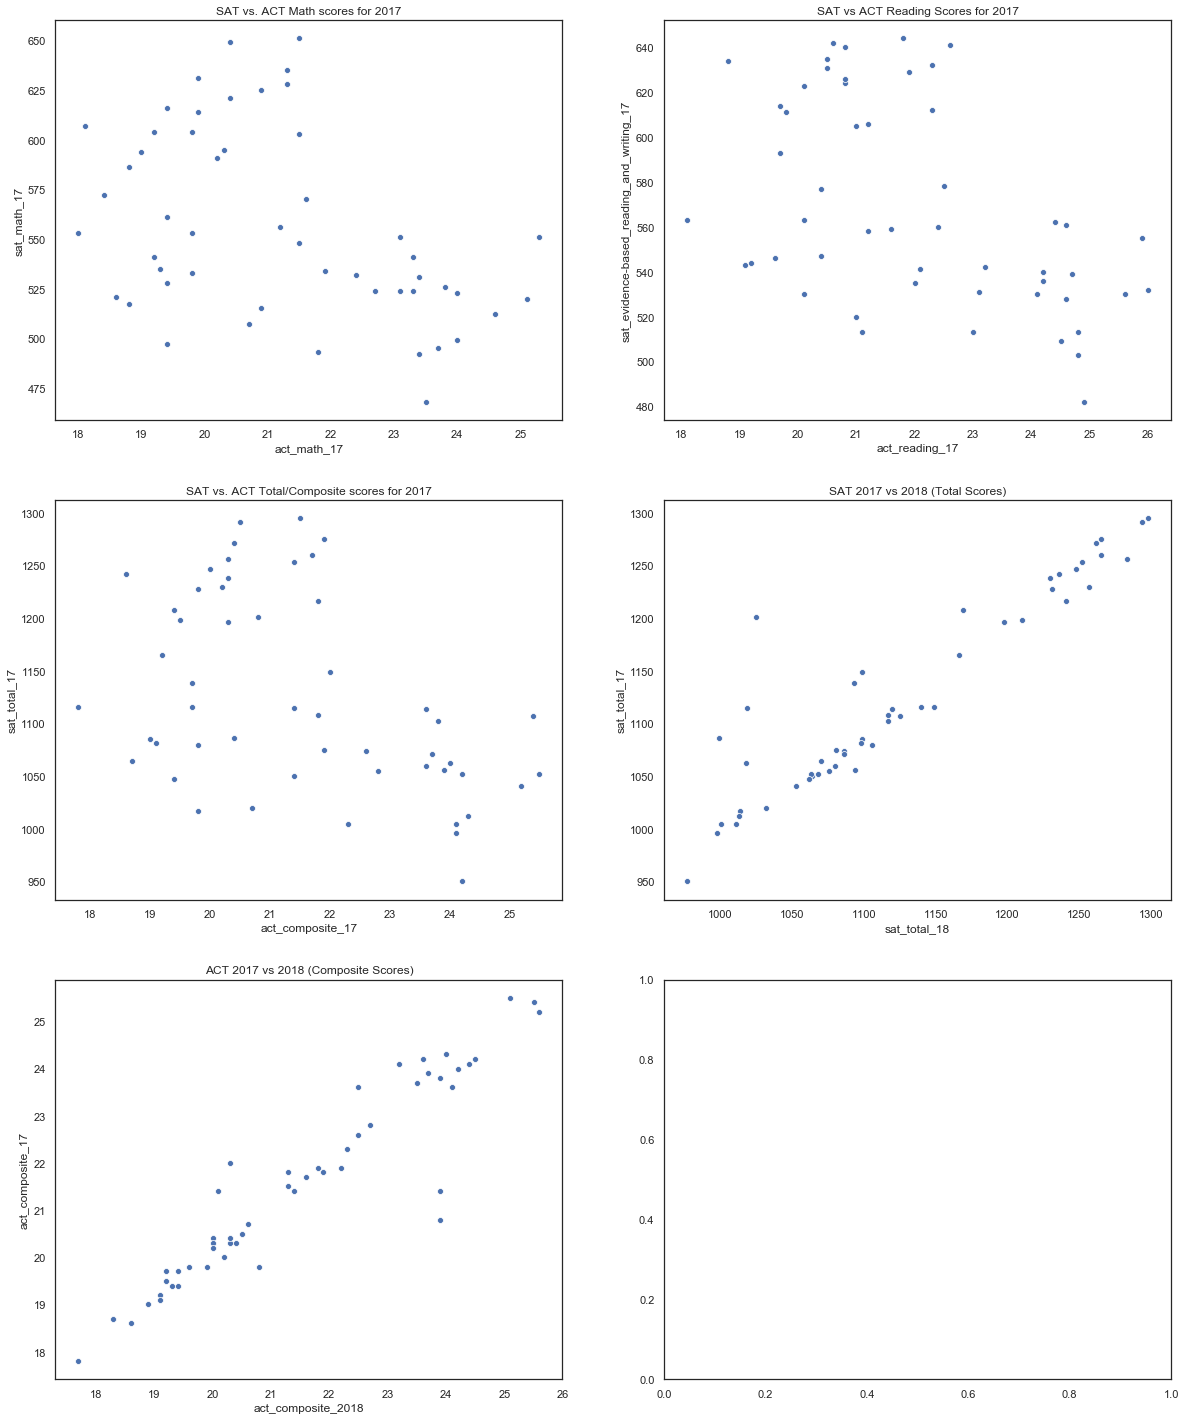

In [138]:
ycols = ['sat_math_17', 'sat_evidence-based_reading_and_writing_17', 'sat_total_17', 'sat_total_17','act_composite_17']
xcols = ['act_math_17', 'act_reading_17', 'act_composite_17', 'sat_total_18', 'act_composite_2018']
titles = ['SAT vs. ACT Math scores for 2017', 'SAT vs ACT Reading Scores for 2017', 'SAT vs. ACT Total/Composite scores for 2017', 'SAT 2017 vs 2018 (Total Scores)', 'ACT 2017 vs 2018 (Composite Scores)']

scatter_subplots(final, xcols, ycols, titles, size=(20,25))

It can be seen that the total average scores for ACT and SAT have a linear correlation with some outliers. Since participation rates tend to have an inverse relationship with the average mean score, sudden changes in scores could be related to that.

For test scores compared between the 2 types of tests, it's harder to find a pattern of correlation, and the scatterplot is much more widely scattered than the comparisons within a single form of test.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

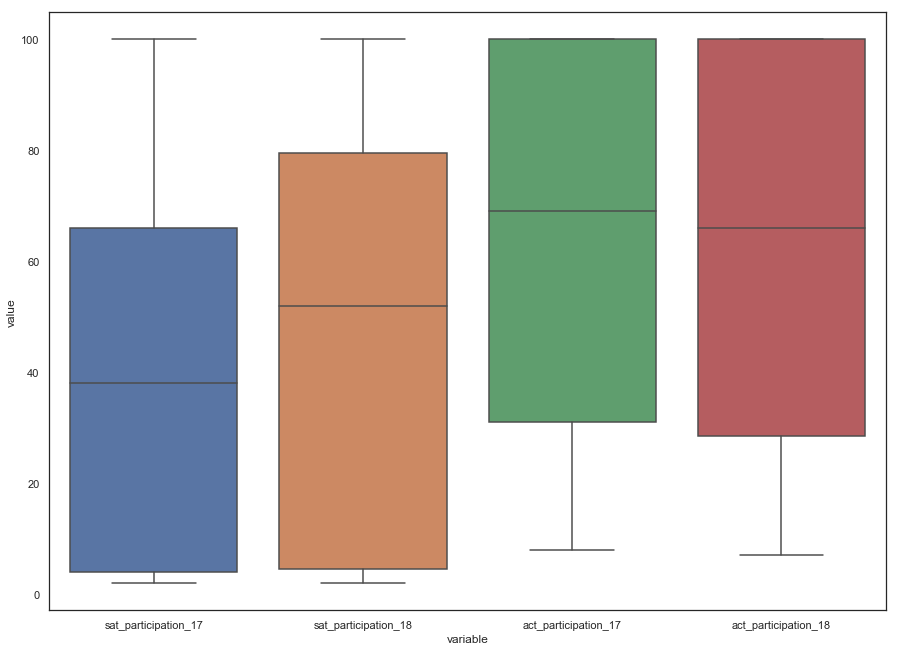

In [139]:
# Using melt to stack 2 columns to create the boxplot figure for SAT participation rates in both years.

melt = pd.DataFrame(final[['sat_participation_17', 'sat_participation_18', 'act_participation_17', 'act_participation_18']])
melted = pd.melt(melt)

plt.figure(figsize=(15,11))
sns.boxplot(x='variable', y='value', data=melted)

We can see via the boxplot above that the SAT participation rate has increased. The median has risen from below 40 to roughly 50 in 2018. 75% of participation rates are now 80 and below in 2018, compared to just close to 70 and below for 2017. 

Things aren't looking that well for the ACT test, as it is now experiencing lower participation rates than in 2017. The median is now closer to 60 than before where it was closer to 70. 50% of participation rates in 2018 now comprise of a lower participation rate, along with the lowest participation rate being a lower figure as compared to 2017.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

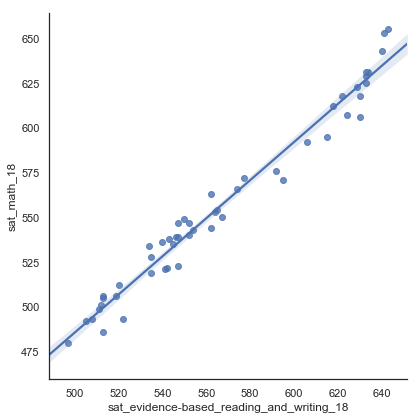

In [140]:
sns.lmplot(x='sat_evidence-based_reading_and_writing_18', y='sat_math_18', data=final, height=6)

Just to see what the relationship is like via a basic regression between both math and reading sections for the SAT: it's clear that this is a pretty much linear correlation. The higher one scores on a section, the higher as well for the other section (and hence a higher total score!).

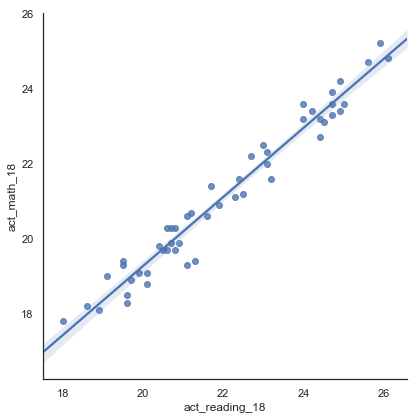

In [141]:
sns.lmplot(x='act_reading_18', y='act_math_18', data=final, height=6)

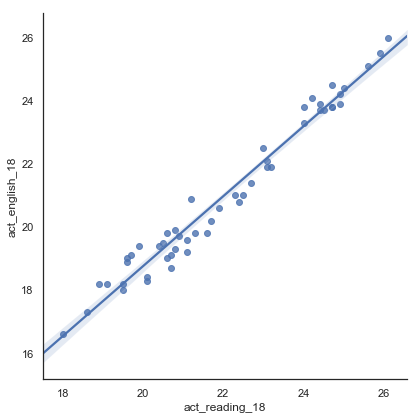

In [142]:
sns.lmplot(x='act_reading_18', y='act_english_18', data=final, height=6)

Checking on the linear regression between the ACT Reading and English sections, and it looks like they're pretty much in a positive linear relationship. Using ACT Reading (the closer type of test to its SAT counterparty) is a good estimate.

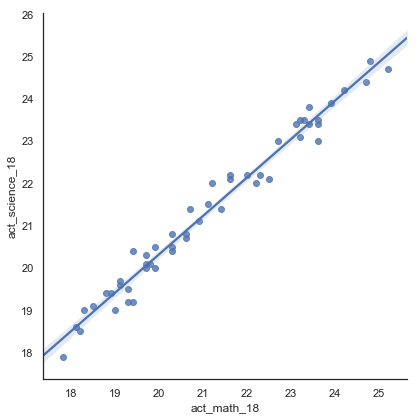

In [143]:
sns.lmplot(x='act_math_18', y='act_science_18', data=final, height=6)

We see the same positive linear relationship between the ACT Math and Science scores.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

<img src="../data/tableau/act_participation_17.jpg">
<img src="../data/tableau/act_participation_18.jpg">
<img src="../data/tableau/act_composite_17.jpg">
<img src="../data/tableau/act_composite_18.jpg">
<img src="../data/tableau/act_reading_17.jpg">
<img src="../data/tableau/act_reading_18.jpg">
<img src="../data/tableau/act_math_17.jpg">
<img src="../data/tableau/act_math_18.jpg">
<img src="../data/tableau/act_science_17.jpg">
<img src="../data/tableau/act_science_18.jpg">
<img src="../data/tableau/act_english_17.jpg">
<img src="../data/tableau/act_english_18.jpg">
<img src="../data/tableau/sat_participation_17.jpg">
<img src="../data/tableau/sat_participation_18.jpg">
<img src="../data/tableau/sat_total_17.jpg">
<img src="../data/tableau/sat_total_18.jpg">
<img src="../data/tableau/sat_math_17.jpg">
<img src="../data/tableau/sat_math_18.jpg">
<img src="../data/tableau/sat_reading_17.jpg">
<img src="../data/tableau/sat_reading_18.jpg">

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [144]:
final.describe()

,sat_participation_17,sat_evidence-based_reading_and_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_18,sat_evidence-based_reading_and_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_2018,act_english_18,act_math_18,act_reading_18,act_science_18
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,46.529412,567.294118,557.254902,1124.666667,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,37.969647,45.317676,48.887562,93.868561,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,497.000000,480.000000,977.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.500000,535.000000,521.500000,1062.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,52.000000,552.000000,547.000000,1099.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,79.500000,616.500000,600.500000,1220.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


Answers:

Mean < Median < Mode: Negative Skew  
Mode < Median < Mean: Positive Skew

sat_participation_17:  
Mean: 39.80  
Median: 38.00  
Std: 35.28  
Skew: Positive  

sat_evidence-based_reading_and_writing_17:  
Mean: 569.12  
Median: 559.00  
Std: 45.67  
Skew: Positive 

sat_math_2017:  
Mean: 556.88  
Median: 548.00  
Std: 47.12  
Skew: Positive  

sat_total_2017:  
Mean: 1126.10  
Median: 1107.00  
Std: 92.49  
Skew: Positive  

act_participation_17:  
Mean: 65.25  
Median: 69.00  
Std: 32.14  
Skew: Negative  

act_english_17:  
Mean: 20.93  
Median: 20.70  
Std: 2.35  
Skew: Slightly positive   

act_math_17:  
Mean: 21.18  
Median: 20.90  
Std: 1.98  
Skew: Slightly positive   

act_reading_17:  
Mean: 22.01  
Median: 21.80  
Std: 2.06  
Skew: Slightly positive   

act_science_17:  
Mean: 21.45  
Median: 21.30  
Std: 1.74  
Skew: Slightly negative   

act_composite_17:  
Mean: 21.52  
Median: 21.40  
Std: 2.02  
Skew: Slightly negative   

sat_participation_18:  
Mean: 46.53  
Median: 52.00  
Std: 37.97  
Skew: Negative   

sat_evidence-based_reading_and_writing_18:  
Mean: 567.29  
Median: 552.00  
Std: 45.32  
Skew: Positive   

sat_math_18:  
Mean: 557.25  
Median: 547.00  
Std: 48.89  
Skew: Positive   

sat_total_18:  
Mean: 1124.67  
Median: 1099.00  
Std: 93.87  
Skew: Positive   

act_participation_18:  
Mean: 61.65  
Median: 66.00  
Std: 34.08  
Skew: Negative   

act_composite_18:  
Mean: 21.49  
Median: 21.30  
Std: 2.11  
Skew: Slightly positive

act_english_18:  
Mean: 20.99  
Median: 20.20  
Std: 2.47  
Skew: Slightly positive

act_math_18:  
Mean: 21.13  
Median: 20.70  
Std: 2.04  
Skew: Positive

act_reading_18:  
Mean: 22.02  
Median: 21.60  
Std: 2.17  
Skew: Positive

act_science_18:  
Mean: 21.35    
Median: 21.10  
Std: 1.87  
Skew: Slightly positive

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:


We don't see any of the variables being normally distributed here. The samples aren't taken on a national level that's randomly chosen, it's chosen at a state level instead.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

The distributions for SAT participation rates shifted to the right due to the overall increase in participation rates, with a huge swing coming from Colorado, whilst the inverse happened to the ACT participation rates, although it must be noted that these changes weren't particularly proportional. The dip in ACT participation rates was much milder compared to the rise in SAT participation rates (see participation boxplots from earlier).

Both math and reading aren't normally distributed as well. 

On a whole, the data isn't reliable as each sample is at a state level, and state population variance can vary greatly between one another.

Samples taken at a national level would have a higher chance of being normally distributed than the current sample statistics that we have.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

It makes sense to a certain extent to do statistical inference for participation rates in 2017 as even though one might assume that the relationship is relatively linearly inverse via scatterplots seen prior, there're other factors at play that makes it difficult to fully assign the relationship purely based on it.

The tests can be seen as somewhat mutually exclusive (and hence a stronger inverse relationship) if more states adopt a requirement state-wide for either of the tests. This, however, also comes with some caveats:

One might assume a student will take one test or the other (most colleges accept either), but some students might still choose to take both. This can be seen in the surge in participation rates for SAT from 2017 to 2018, whilst a similar drop in ACT participation rates wasn't seen.

What major a student might choose to apply for, and which college the student might apply for weighs heavily on the decision as well. Some colleges strongly recommend or outright require the SAT scores, and this will affect the student's choice as well depending on their preference. Students might also participate in both tests and submit them both should high scores be attained, as a way to impress more competitive colleges.

Lastly, some students might take both and try to get a better score on either one of them, perhaps as a safety net should they fail to perform according to their own expectations.

Having said that, should more states (such as Colorado and Illinois) join the SAT bandwagon and cease having ACT as the state level testing requirement, the participation rates will adopt a stronger inverse relationship.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

It isn't appropriate as the format given for each test differs.

Factors include:

- SAT has a calculator and no-calculator segment, ACT allows a calculator throughout.
- SAT focuses a little more on critical thinking on problems, whereas ACT leans towards performing calculations.
- SAT has 4 MCQ options, ACT has 5 options.
- Each question in SAT is accorded more than a minute, ACT is 1 min per question.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [145]:
# Null hypothesis: There's no association between the means of participation rates of both tests in 2017.
# Alternative hypothesis: There's an association between the means of participation rates of both tests in 2017.
# p value < 0.05 will result in rejection of the null hypothesis.

tau, p_value = stats.kendalltau(final['sat_participation_17'], final['act_participation_17'])
tau, p_value

(-0.6203465204431237, 1.2882671702186794e-09)

In [146]:
# Null hypothesis: There's no association between the means of participation rates of both tests in 2018.
# Alternative hypothesis: There's an association between the means of participation rates of both tests in 2018.
# p value < 0.05 will result in rejection of the null hypothesis.

tau, p_value = stats.kendalltau(final['sat_participation_18'], final['act_participation_18'])
tau, p_value

(-0.5904464804688712, 7.027673469913148e-09)

I've decided to use Kendall's tau model as it is a non-parametric method of statistical testing (we don't have a normal distribution on both variables and Kendall's model doesn't assume it to be), and it's less sensitive to outliers which is useful compared to say, Spearman's rho test. 

Interpreting the results, we can see that both tests' p-values are very small, close to zero (less than 0.5), which means we'll reject our null hypothesis and conclude that there is association between the 2 variables.

A negative tau figure at -0.62 for 2017 indicates a stronger negative correlation than 2018 where the tau rises to -0.59. This is in line with what we've observed as SAT participation rates went up by a lot in 2018 for some states, whilst the ACT rates dropped for those very same states. The possible reason why we didn't see a larger increase in tau rates is the drop in ACT rates wasn't proportional to the rise in SAT rates from 2017 to 2018.

Hence, the relationship between the SAT and ACT participation is actually weaker in 2018 than it was in 2017, based on Kendall's tau test, but ultimately it still shows an inverse correlation.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [147]:
final[(final['state'] == 'Illinois') | (final['state'] == 'Colorado') | (final['state'] == 'Ohio')].iloc[:, [0,1,11,5,15]]

,state,sat_participation_17,sat_participation_18,act_participation_17,act_participation_18
5,Colorado,11,100,100,30
13,Illinois,9,99,93,43
35,Ohio,12,18,75,100


The 3 states that I've noted having interesting participation rates trend are: Colorado, Illinois and Ohio.

Let's get started.

#### Colorado:
Colorado switched testing partners from the ACT to SAT in 2015, stating it as a state requirement as a selection committee opted for the College Board over the ACT. This follows after lawmakers voted that the Colorado Department of Education must take competitive bids for both a college-entrance exam and a new exam for 10th-graders.

Following the switch, there was an ongoing option for students making the transition to continue taking the ACT in lieu of the SAT, whilst 10th graders started taking Pre-SATs in preparation for the switch.

This essentially primed all juniors to fully make the switch for the graduating class in 2018, in accordance to the new legislation.

(Source: https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/)

#### Illinois
Illinois made the same switch to the SAT from ACT in 2015 in accordance to requiring to set a college entrance exam as part of the state testing cycle. With that switch, it effectively mirrors Colorado's sudden surge from a very low rate of 9% to 93%.

(Source: https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html)

#### Ohio
Ohio paints a story in contrary to the other 2 states listed above as well as the method that was applied.

ACT has always been the leading test taken there, but it turns out the state paid for all students in the Class of 2018 to take the test, even those not college-bound. As a result, participation rates shot up from 75% to 100%.

(Source: https://www.daytondailynews.com/news/historically-low-act-scores-red-flag-for-our-country/djfx9Urp719WyEaMfykyxL/)


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In [148]:
final[(final['state'] == 'Tennessee')].iloc[:, [0,1,11,5,15]]

,state,sat_participation_17,sat_participation_18,act_participation_17,act_participation_18
42,Tennessee,5,6,100,100


- Influence state school districts to make it a requirement for all high school juniors to take the PSAT in addition to their ACT. This essentially primes them to take on the SAT when they graduate. Since Tenneesee allows for both ACT and SAT testings, such choices are left up to school districts and each of these districts represents an opportunity to create a chain leading to higher future participation rates. School districts should be pushed to promote the idea of a college-bound education.    
  
- Fee Waivers to cover administrative-related costs. This can be offered to different demographics, such as the needy or students from lower-income families.    
   
- SAT School Days offered to as many schools as possible. Making tests as convenient as possible to participate in means students are more likely to take up the test.    
   
- Create more partnerships with study platforms (both online and traditional methods) to make it easier for students to learn and practise the tests. This creates a form of advertisement as well, and makes the SAT brand stand out. The tie-up with popular online study platform, Khan Academy, is a great step forward. 
   
- Make more visits to schools, educate the students on the possibilities that lies ahead for them, of which a college-bound education should be made prominent. Hold talks or conferences near schooling districts, success college stories stemming from a good SAT score make for good product placements.